<a href="https://colab.research.google.com/github/jprodrigues644/ImageClassifier/blob/main/Shape_TUTO_SEBASTIAO_RODRIGUES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEBASTIAO RODRIGUES

# **Analyse et à la visualisation de l'impact des caractéristiques sur les prédictions d'un modèle de régression linéaire en utilisant le dataset Iris et la bibliothèque SHAP**

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.2 MB/s eta 0:00:00


In [ ]:
import sklearn

import shap

# Iris dataset
X, y =shap.datasets.iris(n_points=1000)

X100 = shap.utils.sample(X, 100)  # Sélection d'un échantillon de 100 instances du dataset pour l'analyse

# On utilise un modele lineaire simple
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

sepal length (cm) = -0.11191
sepal width (cm) = -0.04008
petal length (cm) = 0.22865
petal width (cm) = 0.60925


# Graphique de dépendance partielle pour la caractéristique "longueur des pétales"

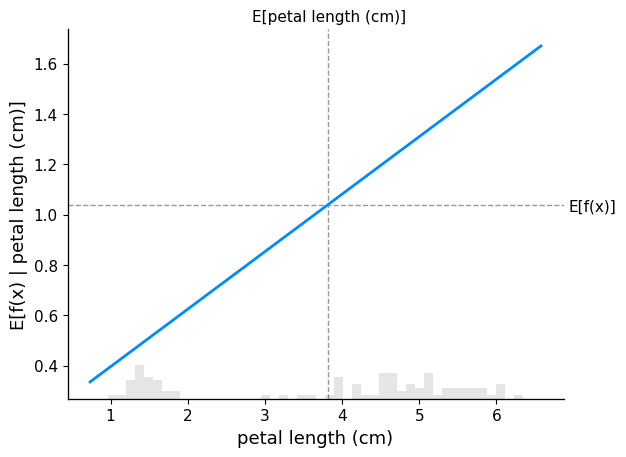

In [ ]:

shap.partial_dependence_plot(
    "petal length (cm)",
    model.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

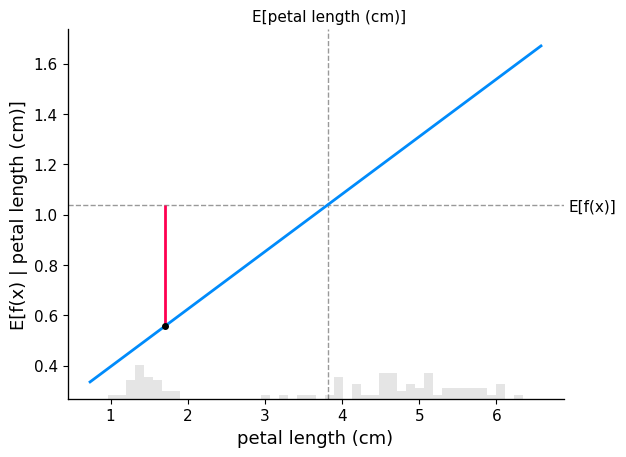

In [ ]:

#
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X) #Calcul des valeurs SHAP

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "petal length (cm)",
    model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
)

# Graphique scatter pour visualiser la relation entre la valeur de la caractéristique "longueur des pétales" et l'impact sur la prédiction du modèle.

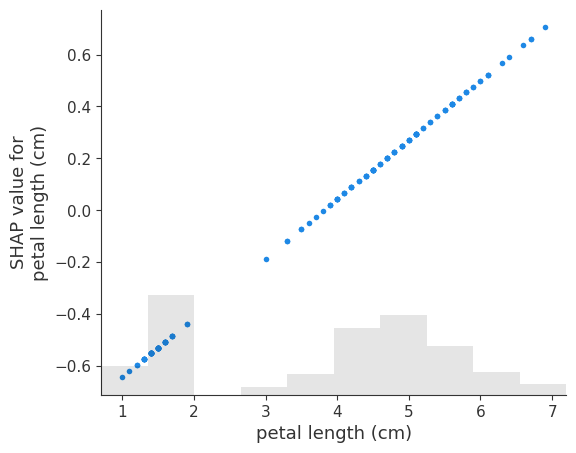

In [ ]:

shap.plots.scatter(shap_values[:, "petal length (cm)"])

# Graphique waterfall pour une instance spécifique, montrant comment chaque caractéristique contribue à la prédiction finale par rapport à la valeur de base.

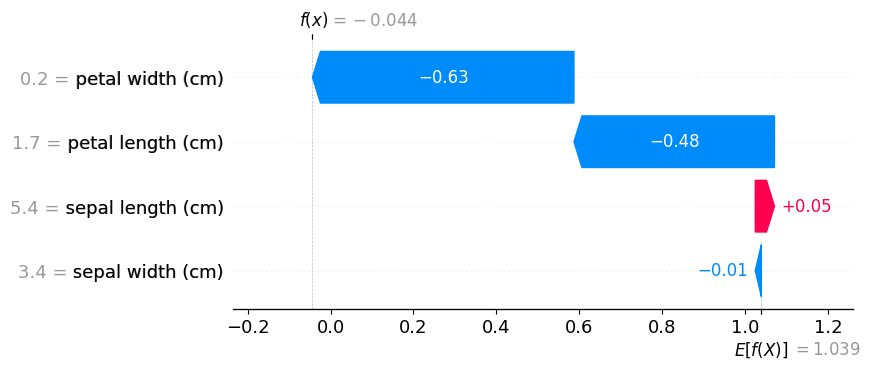

In [ ]:

shap.plots.waterfall(shap_values[sample_ind], max_display=14)

# Heatmap des valeurs SHAP

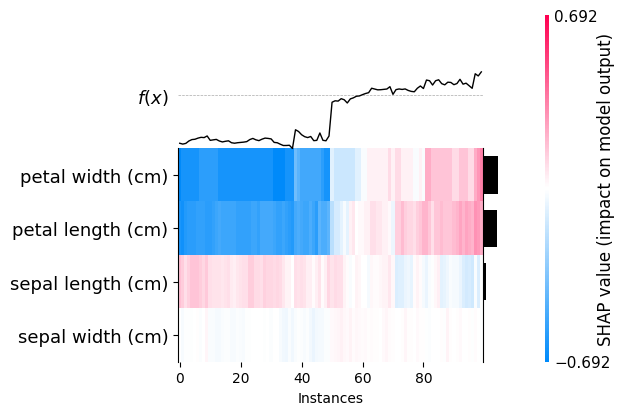

In [ ]:

shap.plots.heatmap(shap_values[:100])

# Graphique beeswarm qui montre la distribution des impacts des caractéristiques sur les prédictions pour l'ensemble des données.

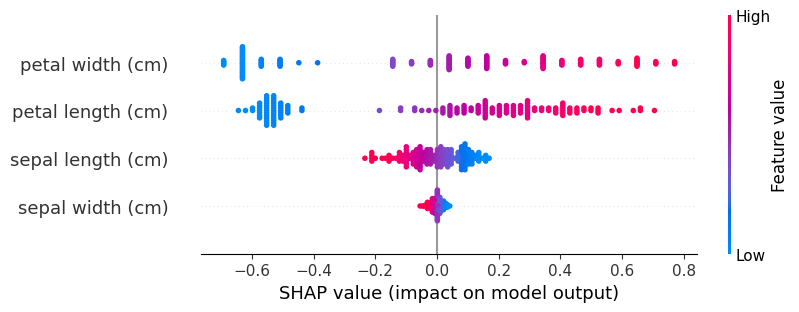

In [ ]:

shap.plots.beeswarm(shap_values)